<a href="https://colab.research.google.com/github/ibarajas248/proyecto_bootcamp_analisis_de_datos/blob/master/Analisis_Ligue_1_2018_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# codigo

In [2]:
pip install matplotlib seaborn

In [3]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 9.8 MB/s eta 0:00:00


In [7]:
# prompt: dataframe partidos
import mysql.connector
from mysql.connector import Error
import pandas as pd

try:
    # Establecer la conexión a la base de datos
    conn = mysql.connector.connect(
        host='bnlrjjogqqtrux5dkhx3-mysql.services.clever-cloud.com',
        port=3306,
        user='ug9k8pdx4fu2lc9p',
        password='MiyaArHakCa5tGKIRcec',
        database='bnlrjjogqqtrux5dkhx3'
    )

    if conn.is_connected():
        print('Conexión exitosa a la base de datos.')

        # Crear un DataFrame desde la tabla 'partidos'
        df_partidos = pd.read_sql('SELECT * FROM partidos', conn)






except Error as e:
    print(f'Error al conectar a la base de datos: {e}')

Conexión exitosa a la base de datos.


<ipython-input-7-df881cda704a>:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_partidos = pd.read_sql('SELECT * FROM partidos', conn)


In [63]:
df_partidos


,id,local,goles_local,goles_visitante,visitante,fecha,jornada,liga,resultado_local,resultado_visitante
0,10000,Marsella,4.0,0.0,Toulouse,2018-08-10 13:45:00,1,Ligue 1 2018/2019,ganado,perdido
1,10001,Nantes,1.0,3.0,Mónaco,2018-08-11 10:00:00,1,Ligue 1 2018/2019,perdido,ganado
2,10002,Montpellier,1.0,2.0,Dijon,2018-08-11 13:00:00,1,Ligue 1 2018/2019,perdido,ganado
3,10003,Angers,3.0,4.0,Nîmes,2018-08-11 13:00:00,1,Ligue 1 2018/2019,perdido,ganado
4,10004,Lille,3.0,1.0,Rennes,2018-08-11 13:00:00,1,Ligue 1 2018/2019,ganado,perdido
...,...,...,...,...,...,...,...,...,...,...
345,10345,Toulouse,2.0,2.0,Rennes,2019-05-05 08:00:00,35,Ligue 1 2018/2019,empatado,empatado
346,10346,Montpellier,1.0,1.0,Amiens,2019-05-05 08:00:00,35,Ligue 1 2018/2019,empatado,empatado
347,10347,Nantes,3.0,0.0,Dijon,2019-05-05 08:00:00,35,Ligue 1 2018/2019,ganado,perdido
348,10348,Mónaco,2.0,3.0,Saint-Etienne,2019-05-05 10:00:00,35,Ligue 1 2018/2019,perdido,ganado


In [60]:
import pandas as pd

# Crear columnas para el resultado del partido
df_partidos['resultado_local'] = df_partidos.apply(
    lambda row: 'ganado' if row['goles_local'] > row['goles_visitante']
    else ('empatado' if row['goles_local'] == row['goles_visitante']
    else 'perdido'), axis=1
)

df_partidos['resultado_visitante'] = df_partidos.apply(
    lambda row: 'ganado' if row['goles_visitante'] > row['goles_local']
    else ('empatado' if row['goles_visitante'] == row['goles_local']
    else 'perdido'), axis=1
)

# Contar resultados para equipos locales
resultados_local = df_partidos.groupby('local')['resultado_local'].value_counts().unstack(fill_value=0)
resultados_local = resultados_local.rename(columns={'ganado': 'ganados', 'empatado': 'empatados', 'perdido': 'perdidos'})

# Contar resultados para equipos visitantes
resultados_visitante = df_partidos.groupby('visitante')['resultado_visitante'].value_counts().unstack(fill_value=0)
resultados_visitante = resultados_visitante.rename(columns={'ganado': 'ganados', 'empatado': 'empatados', 'perdido': 'perdidos'})

# Sumar resultados de locales y visitantes
resultados = resultados_local.add(resultados_visitante, fill_value=0)
resultados = resultados.fillna(0)  # Asegurarse de que no haya valores nulos

# Calcular el total de partidos por equipo
resultados['total'] = resultados['ganados'] + resultados['empatados'] + resultados['perdidos']

# Calcular porcentajes
resultados['% ganados'] = (resultados['ganados'] / resultados['total']) * 100
resultados['% empatados'] = (resultados['empatados'] / resultados['total']) * 100
resultados['% perdidos'] = (resultados['perdidos'] / resultados['total']) * 100

# Ordenar los resultados por partidos ganados en orden descendente
resultados = resultados.sort_values(by='ganados', ascending=False)

# Mostrar el DataFrame resultante
resultados


resultado_local,empatados,ganados,perdidos,total,% ganados,% empatados,% perdidos
local,,,,,,,
PSG,3,27,5,35,77.142857,8.571429,14.285714
Lille,9,20,6,35,57.142857,25.714286,17.142857
Saint-Etienne,8,18,9,35,51.428571,22.857143,25.714286
Lyon,9,18,8,35,51.428571,25.714286,22.857143
Marsella,6,16,13,35,45.714286,17.142857,37.142857
Montpellier,13,14,8,35,40.000000,37.142857,22.857143
Nîmes,7,14,14,35,40.000000,20.000000,40.000000
Niza,10,14,11,35,40.000000,28.571429,31.428571
Nantes,7,13,15,35,37.142857,20.000000,42.857143


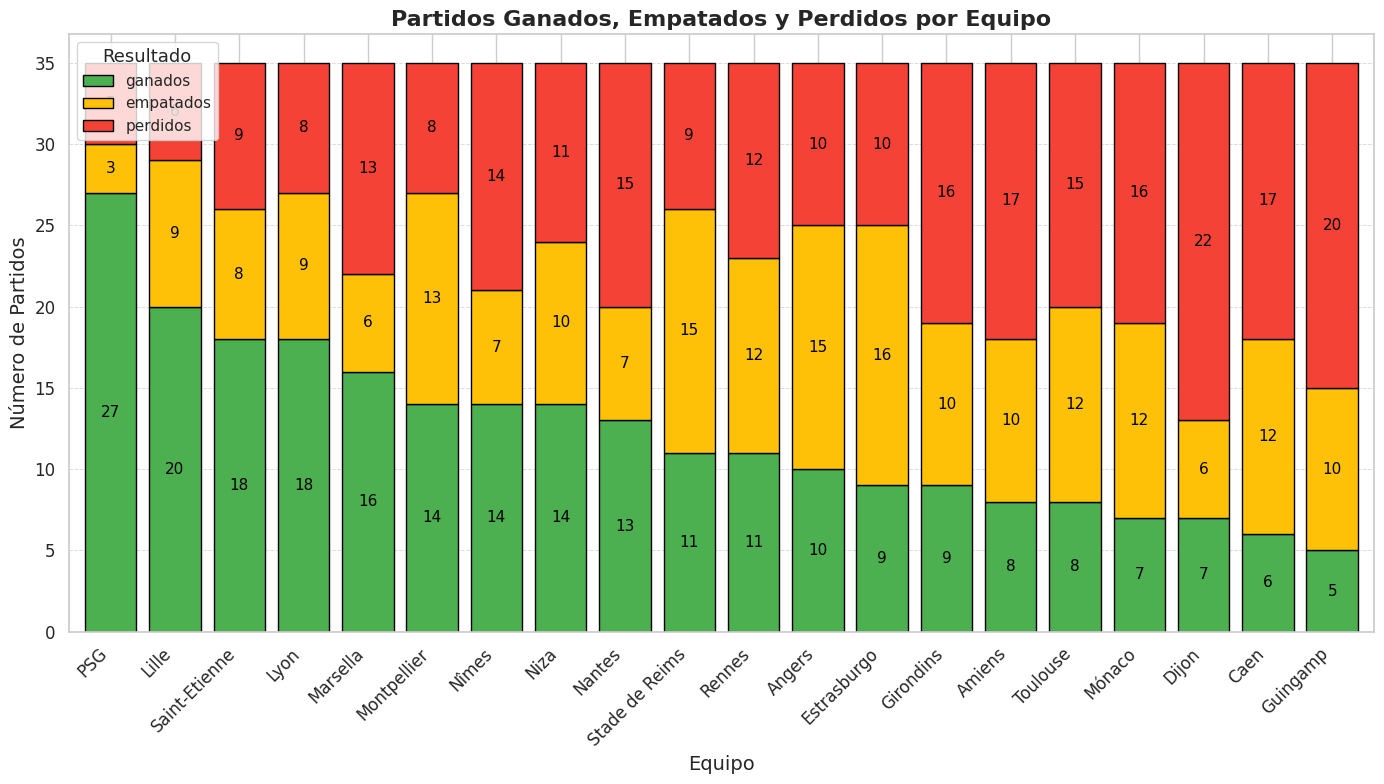

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reordenar las columnas en el DataFrame para que 'ganados' aparezca primero
resultados = resultados[['ganados', 'empatados', 'perdidos']]

# Configuración de estilo con Seaborn
sns.set(style='whitegrid')

# Crear un gráfico de barras verticales apiladas
ax = resultados.plot(kind='bar', stacked=True, figsize=(14, 8),
                     color=['#4CAF50', '#FFC107', '#F44336'], width=0.8, edgecolor='black')

# Personalizar el gráfico
plt.title('Partidos Ganados, Empatados y Perdidos por Equipo', fontsize=16, fontweight='bold')
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Número de Partidos', fontsize=14)
plt.legend(title='Resultado', title_fontsize='13', fontsize='11', loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar etiquetas del eje x para mejor legibilidad
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Añadir valores encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Solo mostrar el valor si hay altura
        plt.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                 f'{int(height)}', ha='center', va='center', fontsize=11, color='black')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



<ipython-input-43-626c05a13243>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados['total'] = resultados.sum(axis=1)
<ipython-input-43-626c05a13243>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados['% ganados'] = resultados['ganados'] / resultados['total'] * 100


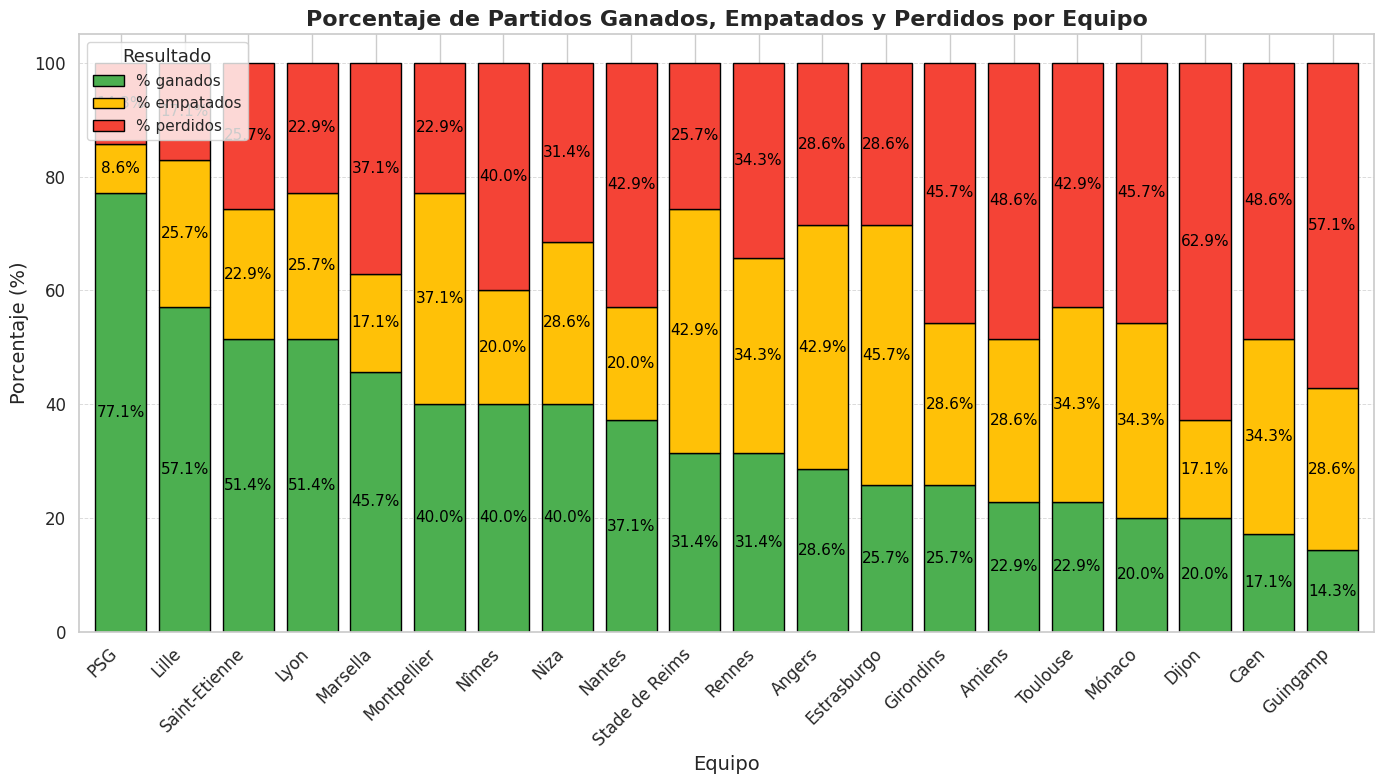

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reordenar las columnas en el DataFrame para que 'ganados' aparezca primero
resultados = resultados[['ganados', 'empatados', 'perdidos']]

# Calcular el porcentaje de partidos ganados, empatados y perdidos
resultados['total'] = resultados.sum(axis=1)
resultados['% ganados'] = resultados['ganados'] / resultados['total'] * 100
resultados['% empatados'] = resultados['empatados'] / resultados['total'] * 100
resultados['% perdidos'] = resultados['perdidos'] / resultados['total'] * 100

# Eliminar la columna de totales que no se necesita para el gráfico
resultados = resultados.drop(columns=['total'])

# Configuración de estilo con Seaborn
sns.set(style='whitegrid')

# Crear un gráfico de barras verticales apiladas
ax = resultados[['% ganados', '% empatados', '% perdidos']].plot(kind='bar', stacked=True, figsize=(14, 8),
                                                                 color=['#4CAF50', '#FFC107', '#F44336'], width=0.8, edgecolor='black')

# Personalizar el gráfico
plt.title('Porcentaje de Partidos Ganados, Empatados y Perdidos por Equipo', fontsize=16, fontweight='bold')
plt.xlabel('Equipo', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.legend(title='Resultado', title_fontsize='13', fontsize='11', loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar etiquetas del eje x para mejor legibilidad
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Añadir porcentajes encima de las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Solo mostrar el valor si hay altura
        plt.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                 f'{height:.1f}%', ha='center', va='center', fontsize=11, color='black')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [67]:
df_partidos
df_partidos.columns

Index(['id', 'local', 'goles_local', 'goles_visitante', 'visitante', 'fecha',
       'jornada', 'liga', 'resultado_local', 'resultado_visitante'],
      dtype='object')

In [71]:
import pandas as pd

# Supongamos que df_partidos es tu DataFrame existente
# Sumar los goles anotados como local
goles_local = df_partidos.groupby('local')['goles_local'].sum().reset_index()
goles_local.columns = ['Equipo', 'Goles_Anotados']

# Sumar los goles anotados como visitante
goles_visitante = df_partidos.groupby('visitante')['goles_visitante'].sum().reset_index()
goles_visitante.columns = ['Equipo', 'Goles_Anotados']

# Combinar los goles anotados como local y visitante
total_goles = pd.concat([goles_local, goles_visitante], axis=0).groupby('Equipo')['Goles_Anotados'].sum().reset_index()

# Ordenar los equipos por la cantidad total de goles anotados en orden descendente
total_goles_sorted = total_goles.sort_values(by='Goles_Anotados', ascending=False)

# Imprimir el resultado
print(total_goles_sorted)



            Equipo  Goles_Anotados
15             PSG            96.0
7            Lille            61.0
8             Lyon            60.0
17   Saint-Etienne            55.0
9         Marsella            54.0
14           Nîmes            52.0
4      Estrasburgo            52.0
10     Montpellier            51.0
16          Rennes            48.0
12          Nantes            46.0
1           Angers            42.0
11          Mónaco            36.0
18  Stade de Reims            33.0
5        Girondins            31.0
19        Toulouse            30.0
0           Amiens            29.0
13            Niza            27.0
2             Caen            26.0
3            Dijon            25.0
6         Guingamp            24.0


In [72]:
total_goles_sorted

,Equipo,Goles_Anotados
15,PSG,96.0
7,Lille,61.0
8,Lyon,60.0
17,Saint-Etienne,55.0
9,Marsella,54.0
14,Nîmes,52.0
4,Estrasburgo,52.0
10,Montpellier,51.0
16,Rennes,48.0
12,Nantes,46.0


In [116]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

try:
    # Establecer la conexión a la base de datos
    conn = mysql.connector.connect(
        host='bnlrjjogqqtrux5dkhx3-mysql.services.clever-cloud.com',
        port=3306,
        user='ug9k8pdx4fu2lc9p',
        password='MiyaArHakCa5tGKIRcec',
        database='bnlrjjogqqtrux5dkhx3'
    )

    if conn.is_connected():
        print('Conexión exitosa a la base de datos.')

        # Crear un DataFrame desde la tabla 'estadisticas'
        df_estadisticas = pd.read_sql("""

SELECT estadisticas.*, partidos.visitante AS contrincante
FROM estadisticas
INNER JOIN partidos ON partidos.id = estadisticas.id_partido
WHERE equipo = 'Lille' AND visitante <> 'Lille'

UNION

SELECT estadisticas.*, partidos.local AS contrincante
FROM estadisticas
INNER JOIN partidos ON partidos.id = estadisticas.id_partido
WHERE equipo = 'Lille' AND local <> 'Lille';


"""
, conn)



except Error as e:
    print(f'Error al conectar a la base de datos: {e}')

finally:
    if conn.is_connected():
        conn.close()
        print('Conexión cerrada.')




Conexión exitosa a la base de datos.
Conexión cerrada.


<ipython-input-116-854ccf630d32>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_estadisticas = pd.read_sql("""


In [117]:
df_estadisticas.columns

Index(['id', 'id_partido', 'equipo', 'intervenciones_portero',
       'tarjetas_amarillas', 'tarjeta_roja', 'faltas_recibidas',
       'faltas_cometidas', 'balones_perdidos', 'balones_recuperados',
       'fuera_de_juego_en_contra', 'contrincante'],
      dtype='object')

In [118]:
 df_estadisticas

,id,id_partido,equipo,intervenciones_portero,tarjetas_amarillas,tarjeta_roja,faltas_recibidas,faltas_cometidas,balones_perdidos,balones_recuperados,fuera_de_juego_en_contra,contrincante
0,5519,10004,Lille,1,1,0,12,12,125,56,1,Rennes
1,5555,10027,Lille,4,2,0,13,13,129,67,3,Guingamp
2,5593,10051,Lille,3,3,0,15,15,174,72,1,Nantes
3,5631,10079,Lille,3,1,0,8,8,174,65,1,Marsella
4,5635,10081,Lille,1,2,0,8,8,133,55,1,Saint-Etienne
5,5671,10104,Lille,1,0,0,13,13,152,67,1,Caen
6,5685,10120,Lille,1,0,0,9,9,156,68,0,Estrasburgo
7,5735,10163,Lille,2,1,0,14,14,159,47,1,Stade de Reims
8,5839,10247,Lille,2,3,0,10,10,135,64,0,Montpellier
9,5859,10264,Lille,2,0,0,9,9,139,59,5,Dijon


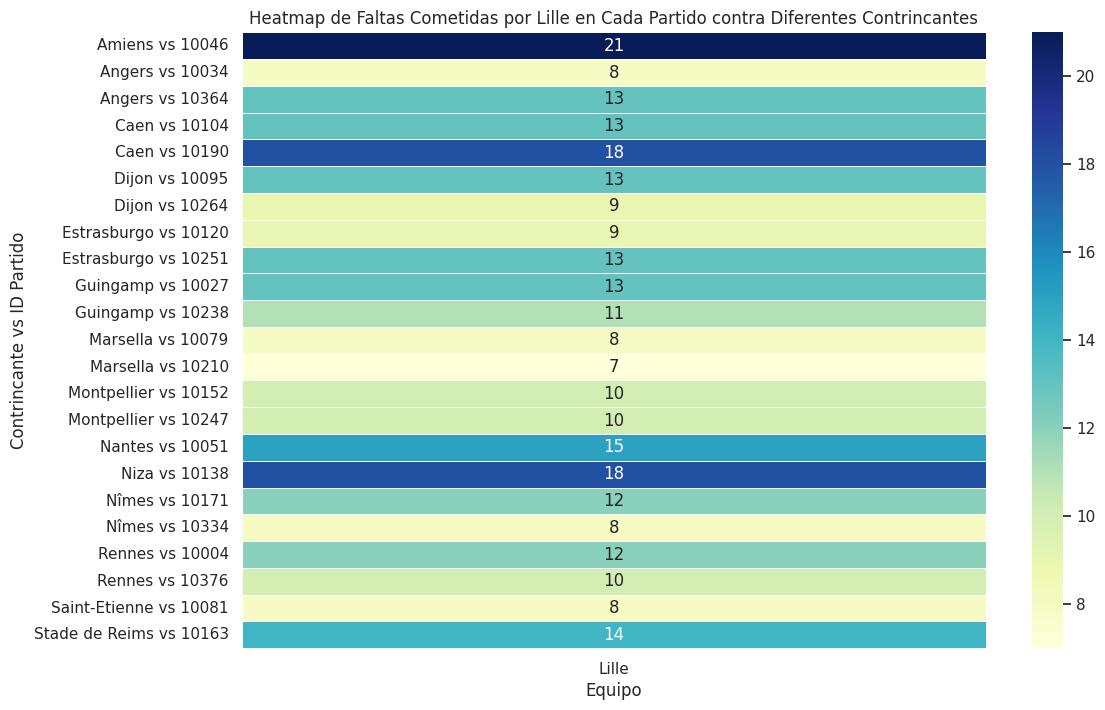

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una nueva columna combinando 'contrincante' y 'id_partido'
df_estadisticas['partido_contrincante'] = df_estadisticas['contrincante'] + ' vs ' + df_estadisticas['id_partido'].astype(str)

# Crear la tabla para el heatmap donde las filas son los partidos y las columnas son los equipos
heatmap_data = df_estadisticas.pivot(index='partido_contrincante', columns='equipo', values='faltas_cometidas')

# Crear el heatmap usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

# Configurar títulos y etiquetas
plt.title('Heatmap de Faltas Cometidas por Lille en Cada Partido contra Diferentes Contrincantes')
plt.xlabel('Equipo')
plt.ylabel('Contrincante vs ID Partido')

# Mostrar el gráfico
plt.show()




# Analisis

Luego de hacer procesamiento de datos con wepscrapping generamos los dataframes a partir de consulta a la base de datos. De la tabla partidos generamos el siguiente dataframe.


In [64]:
df_partidos

,id,local,goles_local,goles_visitante,visitante,fecha,jornada,liga,resultado_local,resultado_visitante
0,10000,Marsella,4.0,0.0,Toulouse,2018-08-10 13:45:00,1,Ligue 1 2018/2019,ganado,perdido
1,10001,Nantes,1.0,3.0,Mónaco,2018-08-11 10:00:00,1,Ligue 1 2018/2019,perdido,ganado
2,10002,Montpellier,1.0,2.0,Dijon,2018-08-11 13:00:00,1,Ligue 1 2018/2019,perdido,ganado
3,10003,Angers,3.0,4.0,Nîmes,2018-08-11 13:00:00,1,Ligue 1 2018/2019,perdido,ganado
4,10004,Lille,3.0,1.0,Rennes,2018-08-11 13:00:00,1,Ligue 1 2018/2019,ganado,perdido
...,...,...,...,...,...,...,...,...,...,...
345,10345,Toulouse,2.0,2.0,Rennes,2019-05-05 08:00:00,35,Ligue 1 2018/2019,empatado,empatado
346,10346,Montpellier,1.0,1.0,Amiens,2019-05-05 08:00:00,35,Ligue 1 2018/2019,empatado,empatado
347,10347,Nantes,3.0,0.0,Dijon,2019-05-05 08:00:00,35,Ligue 1 2018/2019,ganado,perdido
348,10348,Mónaco,2.0,3.0,Saint-Etienne,2019-05-05 10:00:00,35,Ligue 1 2018/2019,perdido,ganado


La tabla que nos muestra el dataframe df_partidos, muestra la información individual de cada partido, este es, equipo local, quipo visitante, goles equipo local, goles equipo visitante, fecha, jornada, liga, resultado local, resultado visitante. Luego de esto generamos otro Dataframe el cual agrupa los partidos ganados, empatados y perdidos de cada equipo, y se añaden columnas de dicho analisis en valor porcentual.

Adicionalmente, la tabla la organizando desde el que mas partidos ganó hasta el que menos, esto se hace para facilitar la lectura.


|local|empatados|ganados|perdidos|total|% ganados|% empatados|% perdidos|
|---|---|---|---|---|---|---|---|
|PSG|3|27|5|35|77\.14285714285715|8\.571428571428571|14\.285714285714285|
|Lille|9|20|6|35|57\.14285714285714|25\.71428571428571|17\.142857142857142|
|Saint-Etienne|8|18|9|35|51\.42857142857142|22\.857142857142858|25\.71428571428571|
|Lyon|9|18|8|35|51\.42857142857142|25\.71428571428571|22\.857142857142858|
|Marsella|6|16|13|35|45\.714285714285715|17\.142857142857142|37\.142857142857146|
|Montpellier|13|14|8|35|40\.0|37\.142857142857146|22\.857142857142858|
|Nîmes|7|14|14|35|40\.0|20\.0|40\.0|
|Niza|10|14|11|35|40\.0|28\.57142857142857|31\.428571428571427|
|Nantes|7|13|15|35|37\.142857142857146|20\.0|42\.857142857142854|
|Stade de Reims|15|11|9|35|31\.428571428571427|42\.857142857142854|25\.71428571428571|
|Rennes|12|11|12|35|31\.428571428571427|34\.285714285714285|34\.285714285714285|
|Angers|15|10|10|35|28\.57142857142857|42\.857142857142854|28\.57142857142857|
|Estrasburgo|16|9|10|35|25\.71428571428571|45\.714285714285715|28\.57142857142857|
|Girondins|10|9|16|35|25\.71428571428571|28\.57142857142857|45\.714285714285715|
|Amiens|10|8|17|35|22\.857142857142858|28\.57142857142857|48\.57142857142857|
|Toulouse|12|8|15|35|22\.857142857142858|34\.285714285714285|42\.857142857142854|
|Mónaco|12|7|16|35|20\.0|34\.285714285714285|45\.714285714285715|
|Dijon|6|7|22|35|20\.0|17\.142857142857142|62\.857142857142854|
|Caen|12|6|17|35|17\.142857142857142|34\.285714285714285|48\.57142857142857|
|Guingamp|10|5|20|35|14\.285714285714285|28\.57142857142857|57\.14285714285714|

### **Interpretación del Gráfico de Partidos Ganados, Empatados y Perdidos por Equipo**

El gráfico presenta una visualización detallada del rendimiento de los equipos en términos de partidos ganados, empatados y perdidos. Cada barra representa un equipo, y las secciones apiladas de cada barra indican la proporción de partidos ganados, empatados y perdidos.

Este gráfico es útil para evaluar rápidamente el desempeño relativo de los equipos. Los equipos con un mayor número de victorias y menos derrotas son candidatos fuertes en la competición. Además, permite una rápida identificación de equipos que necesitan mejorar para alcanzar un mejor rendimiento. Las tendencias y patrones visibles pueden guiar a los analistas en la toma de decisiones y en la formulación de estrategias para futuras competiciones.



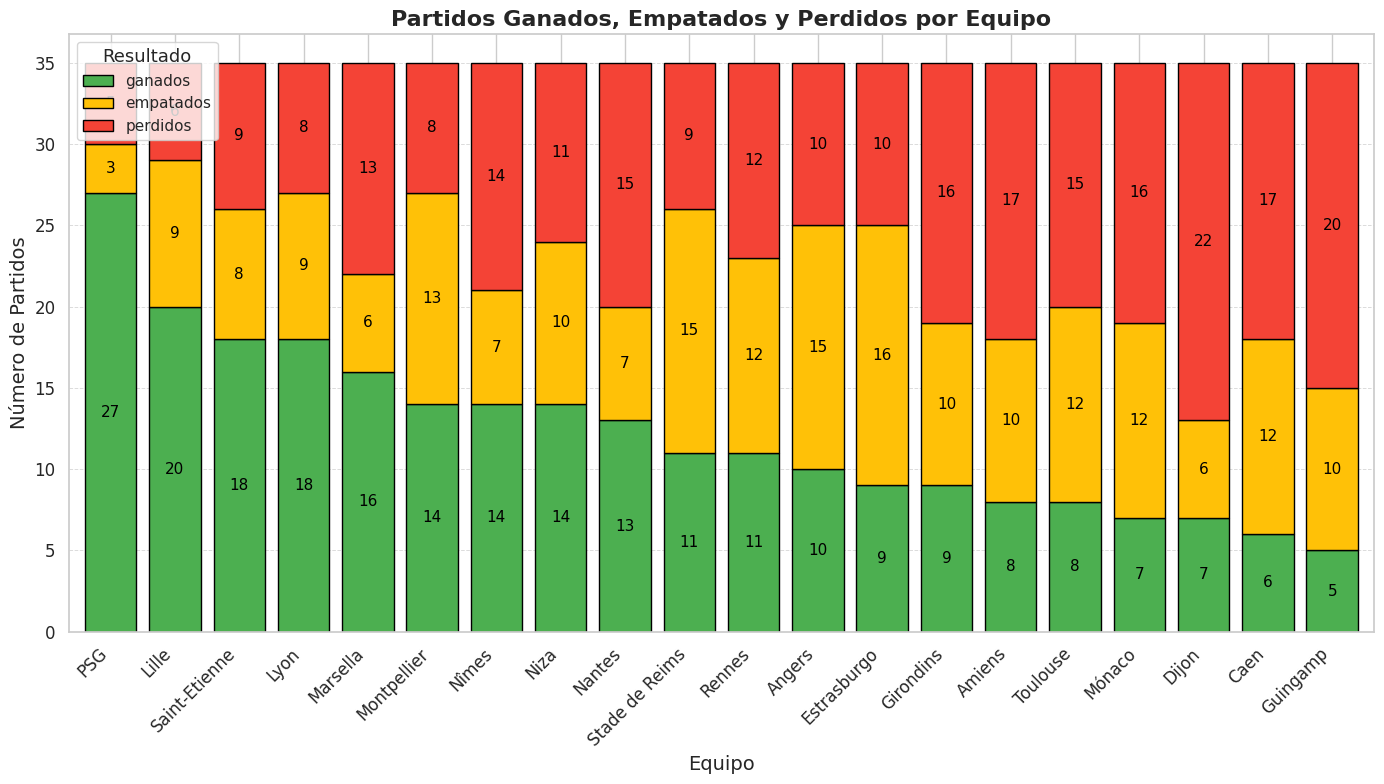


Del grafico de barras apiladas obtenemos la información visial de los datos de la tabla, con la diferencia de que en este caso. El grafico es util para identificar tendencias rapidamente, Así pues podemos establecer que el **PSG** fue el equipo que mejor desempeño tuvo, mientras que el Gulingamp fue el equipo que peor desempeño tuvo. Adicionalmente podemos comparar el desempeño de quipos con una tendencia similar, como es el caso de **Stade de Reims** y **Rennes**, ambos tienes 11 victorias; pero el  **Stade de Reims** tiene un desempeño mejor, pues tiene 15 partidos empatados frente a 9 pertidos. Por su parte el **Rennes** tiene 12 partidos empatados frente a 12 perdidos. lo que lo hace un equipo con peor desempeño frente al **Stade de Reims**.

Otro tipo datos relevandes de este grafico, podria ser que el equipo con más partidos perdidos fue **Dijon** con 22 partidos perdidos, y el equipo que mas partidos empatados fue **Estrasburgo** con 16 empates.

|index|Equipo|Goles\_Anotados|
|---|---|---|
|15|PSG|96\.0|
|7|Lille|61\.0|
|8|Lyon|60\.0|
|17|Saint-Etienne|55\.0|
|9|Marsella|54\.0|
|14|Nîmes|52\.0|
|4|Estrasburgo|52\.0|
|10|Montpellier|51\.0|
|16|Rennes|48\.0|
|12|Nantes|46\.0|
|1|Angers|42\.0|
|11|Mónaco|36\.0|
|18|Stade de Reims|33\.0|
|5|Girondins|31\.0|
|19|Toulouse|30\.0|
|0|Amiens|29\.0|
|13|Niza|27\.0|
|2|Caen|26\.0|
|3|Dijon|25\.0|
|6|Guingamp|24\.0|


También contamos la cantidad de Goles que hace un equipo en toda la temporada. Podemos evidenciar que el comportamiento de la tendencia es parecido, sin embargo la cantidad de goles no siempre evidencia el desempeño real del equipo. Si observamos **Mónaco**, es un equipo que hizo más goles que **Stade de Reims**; sin embargo su desempeño fue mucho peor.

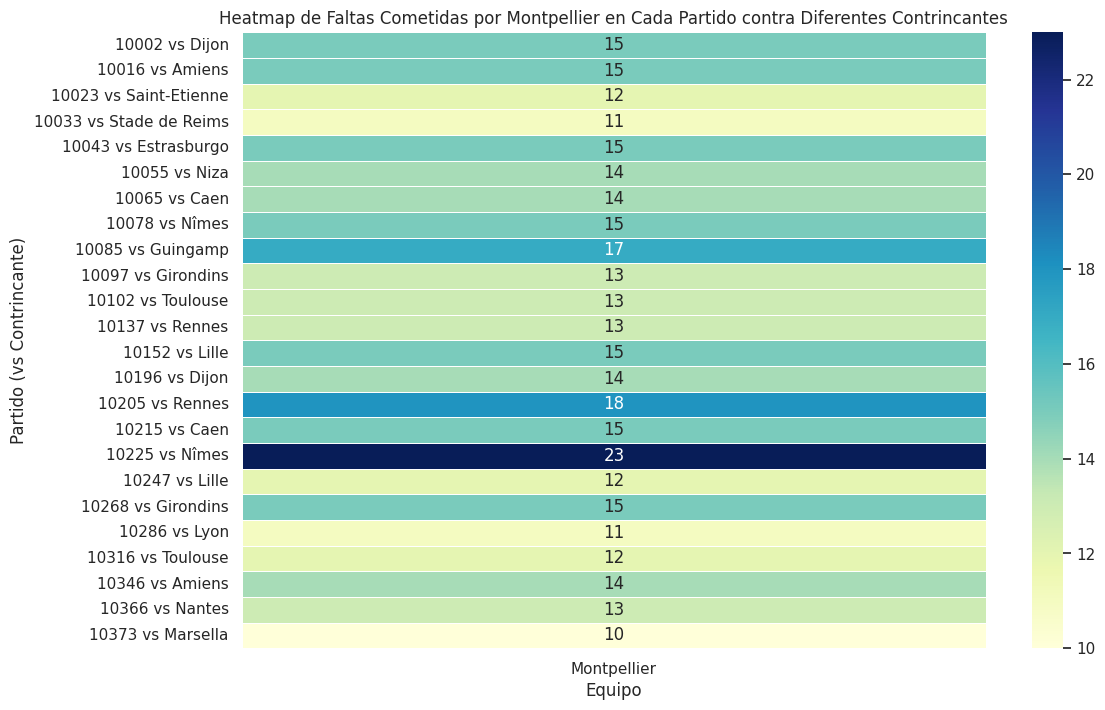